### Tasks:

- Load the transaction_data.csv dataset. Check the table size, variable types, the number of missing values, and descriptive statistics.
- What values are in the transaction column? How many observations relate to each level? Visualize the result using a bar plot. Consider how the graph can be improved.
- How many transactions ended in error?
- How many successful transactions has each user made? Plot a histogram of the distribution of the number of successful transactions.
- A colleague has sent you updated data. Create a pivot table user_vs_minute_pivot, where the columns will be user names, rows – minutes, and values – the number of operations performed at the specified minute. Fill missing values with zeros.
- Study the presented graph. Help your colleague figure out whether there is an error in the data, or everything is fine.
- If an error has crept into the data, correct it and save the correct number of minutes that have passed since the beginning of the day in the true_minute column.

## Data Description:

The following data is available:

- date – date (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
- name – username
- transaction – transaction status
- minute* – how many minutes have passed since the beginning of the day

1. Load the transaction_data.csv dataset. Check the table size, variable types, the number of missing values, and descriptive statistics.

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-borschigov/Python/Lesson_5/Miniproject/transaction_data.csv')

In [33]:
df.shape

(5315, 3)

In [34]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [35]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

2. What values are in the transaction column? How many observations relate to each level? Visualize the result using a bar plot. Consider how the graph can be improved.

In [36]:
df.transaction.nunique()

3

In [37]:
first_vis = df['transaction'].value_counts()

In [38]:
first_vis

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

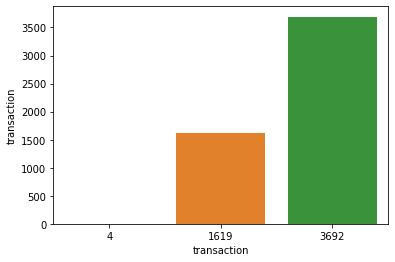

In [40]:
sns.barplot(x = first_vis, y = df.transaction.value_counts())

3. How many transactions ended in error?

In [41]:
first_vis

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

4. How many successful transactions has each user made? Plot a histogram of the distribution of the number of successful transactions.

In [42]:
second_vis = df\
.query('transaction == "successfull"')\
.groupby('name')\
.agg({'date': 'count'})\
.rename(columns = {'date': 'amount_of_transactions'})

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


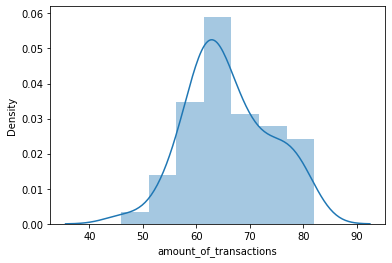

In [43]:
sns.distplot(second_vis.amount_of_transactions)

In [44]:
second_vis.describe()

,amount_of_transactions
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


5. A colleague has sent you updated data. Create a pivot table user_vs_minute_pivot, where the columns will be user names, rows – minutes, and values – the number of operations performed at the specified minute. Fill missing values with zeros.

In [45]:
user_vs_minute = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-borschigov/Python/Lesson_5/Miniproject/transaction_data_updated.csv')

In [46]:
user_vs_minute

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [47]:
user_vs_minute_pivot = user_vs_minute.pivot_table(index = 'minute', columns = 'name', values = 'transaction', aggfunc = 'count').reset_index()

In [48]:
user_vs_minute_pivot = user_vs_minute_pivot.fillna(0)

In [49]:
user_vs_minute_pivot

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0
5,5,3.0,0.0,2.0,3.0,1.0,0.0,5.0,3.0,1.0,...,0.0,2.0,3.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0
6,6,4.0,1.0,2.0,2.0,0.0,4.0,5.0,2.0,2.0,...,2.0,1.0,4.0,1.0,2.0,4.0,1.0,2.0,0.0,2.0
7,7,3.0,2.0,1.0,2.0,2.0,3.0,4.0,1.0,1.0,...,3.0,1.0,1.0,2.0,4.0,1.0,0.0,1.0,2.0,2.0
8,8,2.0,4.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,...,0.0,1.0,0.0,1.0,2.0,4.0,2.0,1.0,1.0,1.0
9,9,2.0,4.0,2.0,3.0,4.0,0.0,3.0,2.0,2.0,...,2.0,3.0,1.0,2.0,4.0,2.0,3.0,0.0,1.0,4.0


6. Study the presented graph. Help your colleague figure out whether there is an error in the data, or everything is fine.
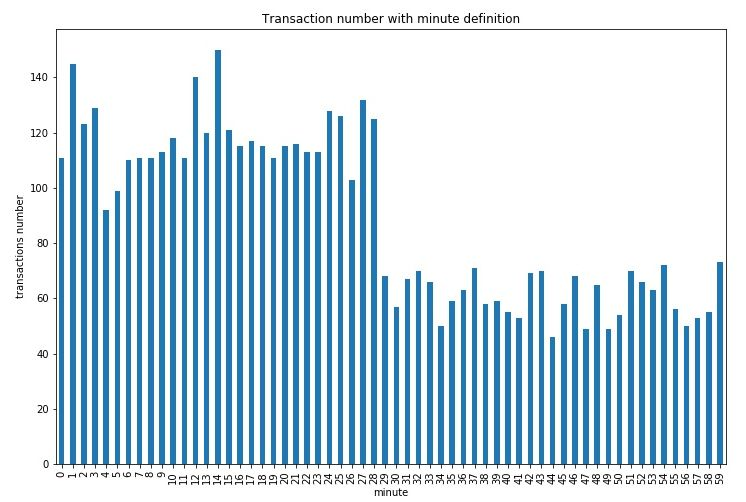

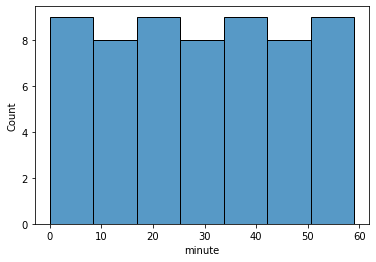

In [50]:
sns.histplot(data = user_vs_minute_pivot, x = 'minute')

7. If an error has crept into the data, correct it and save the correct number of minutes that have passed since the beginning of the day in the true_minute column.

In [51]:
user_vs_minute['date'] = pd.to_datetime(user_vs_minute['date'])

In [52]:
user_vs_minute.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [53]:
user_vs_minute.date.dt.minute

0       37
1       59
2        6
3        2
4       17
        ..
5310     9
5311    46
5312    16
5313    13
5314    15
Name: date, Length: 5315, dtype: int64

In [54]:
user_vs_minute

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [55]:
user_vs_minute['true_minute'] = user_vs_minute.date.dt.minute + user_vs_minute.date.dt.hour * 60

In [56]:
user_vs_minute

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13


In [57]:
user_vs_minute.true_minute.value_counts()

14    80
1     77
72    75
27    73
59    73
      ..
65    47
44    46
8     46
64    35
89     5
Name: true_minute, Length: 90, dtype: int64

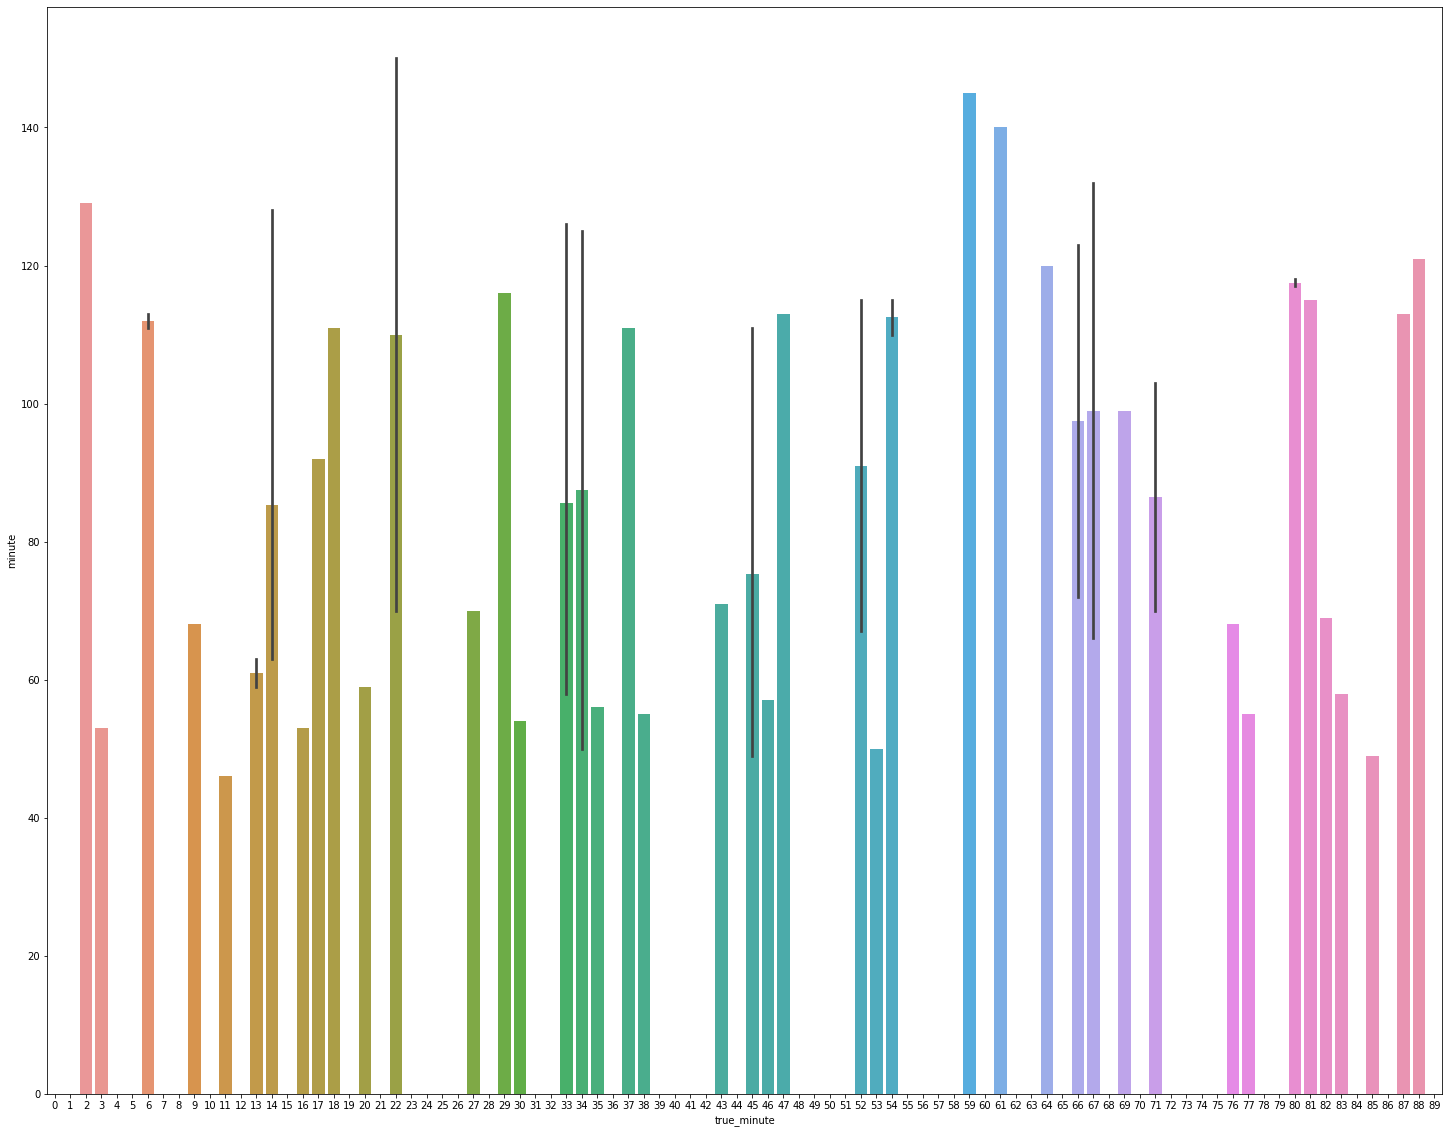

In [58]:
plt.figure(figsize=(25,20))
sns.barplot(x = user_vs_minute.true_minute, y = user_vs_minute.minute.value_counts())

In [59]:
# I'll need to rebuild this graph sometime later.

## Additional Project

In the subsid folder (shared/homeworks/python_ds_miniprojects/5_subsid), there are files (tm_sales_1, tm_sales_2, ...) with product sales through telemarketing. Each file contains at least 4 columns (fields): FILIAL_ID, SUBS_ID, PROD_ID, ACT_DTTM.

The essence of the task is to check the connections of products to specific users by joining sales files with connection logs in the system.

Data Features:

- telemarketing employees do not always specify the full id, if 'id' is not at the beginning of SUBS_ID, it needs to be added
- fields in the files can be located in a completely random order, but field names are static
- a sale is not counted if the disconnection (END_DTTM) occurred less than 5 minutes after the connection (START_DTTM)
- if a row without a specified SUBS_ID is encountered in the sales file, it is skipped

Save the result in a csv file with a ; delimiter, containing correct connections.

In [60]:
from pathlib import Path
import os
import pandas as pd

In [61]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-borschigov/shared/homeworks/python_ds_miniprojects/5_subsid/subsid/'

In [62]:
miniproject_path = Path(path)
miniproject_path

PosixPath('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-borschigov/shared/homeworks/python_ds_miniprojects/5_subsid/subsid')

In [63]:
# or use .glob method

tm_sales = pd.DataFrame()

for csv_path in miniproject_path.glob('**/tm*.csv'):
    temp_df = pd.read_csv(csv_path, sep = ';')

    tm_sales = pd.concat((tm_sales, temp_df))

In [64]:
tm_sales

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
1,NaN,4,7421,12-03-2020 11:25
2,8362218,7,9879,05-03-2020 11:42
3,2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [65]:
tm_sales = tm_sales.dropna()

In [66]:
tm_sales

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
2,8362218,7,9879,05-03-2020 11:42
3,2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [67]:
tm_sales['SUBS_ID'] = tm_sales.SUBS_ID.apply(lambda x: str(x) if x.startswith('id') else 'id' + x)

# Не совсем понимаю, в чем прикол, почему х считается как серия, в которую можно добавялть id??

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
tm_sales

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,id7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
2,id8362218,7,9879,05-03-2020 11:42
3,id2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [69]:
prod_activation_logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-borschigov/shared/homeworks/python_ds_miniprojects/5_subsid/subsid/prod_activations_logs.csv', sep = ';')

In [70]:
data = prod_activation_logs.merge(tm_sales, how = 'inner', on = ['SUBS_ID', 'PROD_ID'])

In [71]:
data

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,FILIAL_ID,ACT_DTTM
0,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00,1,20-03-2020 14:59
1,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03,5,19-03-2020 13:00
2,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00,3,17-03-2020 10:17
3,id2185490,3210,16-03-2020 16:28,01-12-2020 00:00,2,16-03-2020 16:28
4,id7642700,3020,15-03-2020 14:21,15-03-2020 23:42,6,15-03-2020 14:21


In [72]:
data['START_DTTM'] = pd.to_datetime(data['START_DTTM'],  format='%d-%m-%Y %H:%M')
data['END_DTTM'] = pd.to_datetime(data['END_DTTM'],  format='%d-%m-%Y %H:%M')
data['ACT_DTTM'] = pd.to_datetime(data['ACT_DTTM'],  format='%d-%m-%Y %H:%M')

In [73]:
data.dtypes

SUBS_ID               object
PROD_ID                int64
START_DTTM    datetime64[ns]
END_DTTM      datetime64[ns]
FILIAL_ID              int64
ACT_DTTM      datetime64[ns]
dtype: object

In [74]:
data

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,FILIAL_ID,ACT_DTTM
0,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00,1,2020-03-20 14:59:00
1,id7646509,6431,2020-03-19 13:00:00,2020-03-19 13:03:00,5,2020-03-19 13:00:00
2,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00,3,2020-03-17 10:17:00
3,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00,2,2020-03-16 16:28:00
4,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00,6,2020-03-15 14:21:00


In [75]:
data['result'] = data['END_DTTM'] - data['START_DTTM']

In [76]:
data

,SUBS_ID,PROD_ID,START_DTTM,END_DTTM,FILIAL_ID,ACT_DTTM,result
0,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00,1,2020-03-20 14:59:00,255 days 09:01:00
1,id7646509,6431,2020-03-19 13:00:00,2020-03-19 13:03:00,5,2020-03-19 13:00:00,0 days 00:03:00
2,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00,3,2020-03-17 10:17:00,8 days 00:43:00
3,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00,2,2020-03-16 16:28:00,259 days 07:32:00
4,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00,6,2020-03-15 14:21:00,0 days 09:21:00


In [77]:
data.result > '5m'

0     True
1    False
2     True
3     True
4     True
Name: result, dtype: bool

In [78]:
data = data.drop(labels = 1, axis = 0).reset_index()

In [79]:
data = data.drop(labels = 'index', axis = 1)

In [80]:
data.to_csv('data', sep = ';')